In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
x,y = datasets.load_breast_cancer(return_X_y=True)

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=0)

from sklearn.tree import DecisionTreeClassifier,export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

                                Parameter Tuning
* Pre-pruning and post-pruning (not in sklearn yet)

* Limit tree size (pick one, maybe two):

  1. max_depth

  2. max_leaf_nodes

  3. min_samples_split

  4. min_impurity_decrease

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': range(2, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
tree = DecisionTreeClassifier(max_leaf_nodes=6)
tree.fit(X_train,y_train)

tree.feature_importances_

array([0.       , 0.       , 0.5330717, 0.4669283])

                                  Poor man’s ensembles
* Build different models
* Average the result
* Owen Zhang (long time kaggle 1st): build XGBoosting models with different random seeds.
* More models are better – if they are not correlated.
* Also works with neural networks
* You can average any models as long as they provide calibrated (“good”) probabilities.
* Scikit-learn: VotingClassifier hard and soft voting

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
voting = VotingClassifier(
    [('logreg', LogisticRegression(C=100)),
     ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
    voting='soft')
voting.fit(x_train, y_train)
lr, tree = voting.estimators_
voting.score(x_test, y_test), lr.score(x_test, y_test), tree.score(x_test, y_test)

(0.9370629370629371, 0.9370629370629371, 0.916083916083916)

                                Bagging (Bootstrap AGGregation)
* Generic way to build “slightly different” models
* BaggingClassifier, BaggingRegressor



                                     Randomize in two ways
* For each tree:
  Pick bootstrap sample of data

* For each split:
  Pick random sample of features

* More trees are always better

                                     Tuning Random Forests
* Main parameter: max_features
    * around sqrt(n_features) for classification
    * Around n_features for regression
* n_estimators > 100

* Prepruning might help, definitely helps with model size!
* max_depth, max_leaf_nodes, min_samples_split again

# Variable Importance

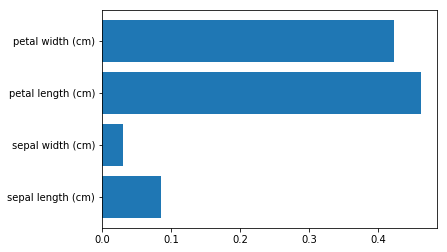

In [113]:
import matplotlib.pyplot as plt
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf.feature_importances_
plt.barh(range(4), rf.feature_importances_)
plt.yticks(range(4), iris.feature_names);